0.9154387925925136


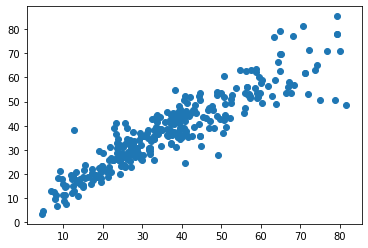

In [83]:
import pandas as pd
import numpy as np

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/回帰課題データ.csv', encoding="utf-8")
X = df.iloc[:,:8].values # 説明変数
y = df.iloc[:,8].values # 被説明変数

ave_corrcoef = []
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # ランダムに70%を訓練データとして用いる
  model = MLPRegressor(hidden_layer_sizes=(100,),learning_rate="adaptive",learning_rate_init=0.001,max_iter=3000, early_stopping = False) # modelはMLPRegressorを用いる
  model.fit(X_train, y_train)
  y_predicted = model.predict(X_test)
  corrcoef = np.corrcoef(y_test,y_predicted) # 相関行列
  ave_corrcoef = np.append(ave_corrcoef,corrcoef[0,1])

print(np.average(ave_corrcoef)) # 相関の平均
plt.scatter(y_test,y_predicted)